In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [2]:
class CrashState(TypedDict):
    input:str
    step1:str
    step2:str
    step3:str

In [6]:
# define sstates

def step_1(state: CrashState):
    print('Step 1 executed')
    return {'step1': 'done', 'input':state['input']}

def step_2(state: CrashState):
    print('Step 2 hanging....now manually interrupt from thr notebook toolball(stop button)')
    time.sleep(30)
    return {'step1': 'done'}

def step_3(state: CrashState):
    print('Step 3 executed')
    return {'done': True}


In [8]:
builder=StateGraph(CrashState)

builder.add_node('step_1', step_1)
builder.add_node('step_2', step_2)
builder.add_node('step_3', step_3)

builder.add_edge(START, 'step_1')
builder.add_edge('step_1', 'step_2')
builder.add_edge('step_2',  'step_3')
builder.add_edge('step_3', END)

checkpoint=InMemorySaver()

graph=builder.compile(checkpointer=checkpoint)


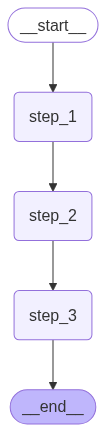

In [9]:
graph

In [11]:
config={'configurable':{'thread_id':1}}
try:
    print("Running graph:Please manually interrupt during step 2")
    graph.invoke({'input':'start'}, config=config)
except:
    print("Kernel manually interrupted(crash simulated)")

Running graph:Please manually interrupt during step 2
Step 1 executed
Step 2 hanging....now manually interrupt from thr notebook toolball(stop button)
Kernel manually interrupted(crash simulated)


In [12]:
graph.get_state(config)

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aba4-c153-62c4-8004-04fdd0425dbc'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-09-06T00:41:59.349306+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aba4-c150-6b5c-8003-2ce0cbfa4bc5'}}, tasks=(PregelTask(id='5b4ba8ea-b263-530f-98db-a539cdf4faed', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [16]:
list(graph.get_state_history(config=config))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aba4-c153-62c4-8004-04fdd0425dbc'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-09-06T00:41:59.349306+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aba4-c150-6b5c-8003-2ce0cbfa4bc5'}}, tasks=(PregelTask(id='5b4ba8ea-b263-530f-98db-a539cdf4faed', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aba4-c150-6b5c-8003-2ce0cbfa4bc5'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-09-06T00:41:59.348296+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id

In [17]:
final_state=graph.invoke(None, config=config)
print("\nfinal_state: ", final_state)

Step 2 hanging....now manually interrupt from thr notebook toolball(stop button)
Step 3 executed

final_state:  {'input': 'start', 'step1': 'done'}
